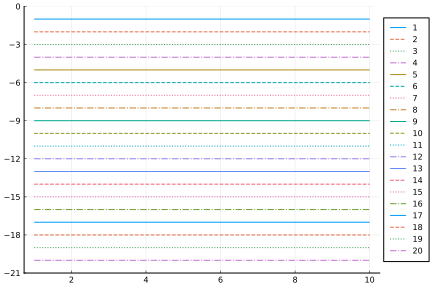

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall D:\.julia\packages\PyCall\BD546\src\numpy.jl:67


In [1]:
using Plots
pyplot(fmt = :svg)

function testplot()
    P = plot(legend=:outerright)
    for i in 1:20
        plot!(fill(-i, 10); label="$i", ls=:auto, ylim=(-21, 0))
    end
    P
end

testplot()

In [2]:
# Add :dashdotdot linestyle to Plots.PyPlotBackend()

@eval Plots begin
    push!(_pyplot_style, :dashdotdot)

    const dic_py_linestyle = Dict(
        :none => " ",
        :solid => "-",
        :dash => "--",
        :dot => ":",
        :dashdot => "-.",
        :dashdotdot => (0, (6, 1.2, 1.5, 1.2, 1.5, 1.2)),
    )

    function py_linestyle(seriestype::Symbol, linestyle::Symbol)
        ls = get(dic_py_linestyle, linestyle, nothing)
        !isnothing(ls) && return ls
        @warn("Unknon linestyle $linestyle")
        return "-"
    end
end

py_linestyle (generic function with 1 method)

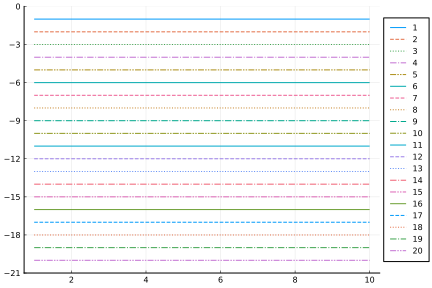

In [3]:
testplot()

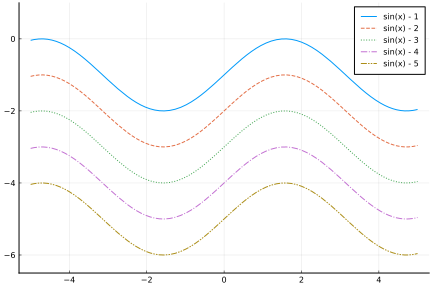

In [4]:
plot()
for (k, linestyle) in enumerate(Plots._pyplot_style[2:end])
    plot!(x -> sin(x) - k, -5, 5; label="sin(x) - $k", ylim=(-6.5, 1.0), linestyle)
end
plot!()